# ARIMA Model for Stock Market Prediction

## Importing Libraries

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")


### Reading Data 

In [2]:
df = pd.read_csv("ISEQ.csv",parse_dates=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-10,3484.330078,3501.919922,3483.060059,3490.590088,3490.590088,0.0
1,1997-07-11,3490.590088,3518.879883,3490.590088,3514.439941,3514.439941,0.0
2,1997-07-14,3514.439941,3538.080078,3514.020020,3535.129883,3535.129883,0.0
3,1997-07-15,3535.129883,3544.030029,3515.840088,3527.060059,3527.060059,0.0
4,1997-07-16,3527.060059,3582.679932,3523.439941,3576.949951,3576.949951,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 7 columns):
Date         6024 non-null object
Open         5925 non-null float64
High         5925 non-null float64
Low          5925 non-null float64
Close        5925 non-null float64
Adj Close    5925 non-null float64
Volume       5925 non-null float64
dtypes: float64(6), object(1)
memory usage: 329.5+ KB


In [4]:
df.isnull().sum()

Date          0
Open         99
High         99
Low          99
Close        99
Adj Close    99
Volume       99
dtype: int64

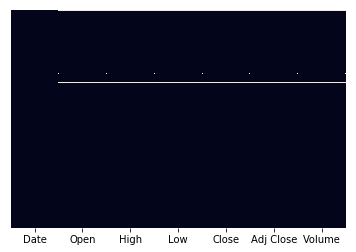

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Data Cleaning Process

In [6]:
df.fillna(df.mean(), inplace=True)

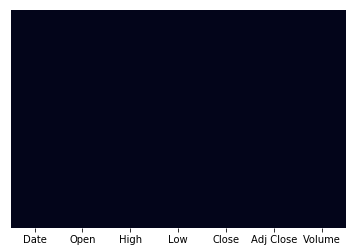

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

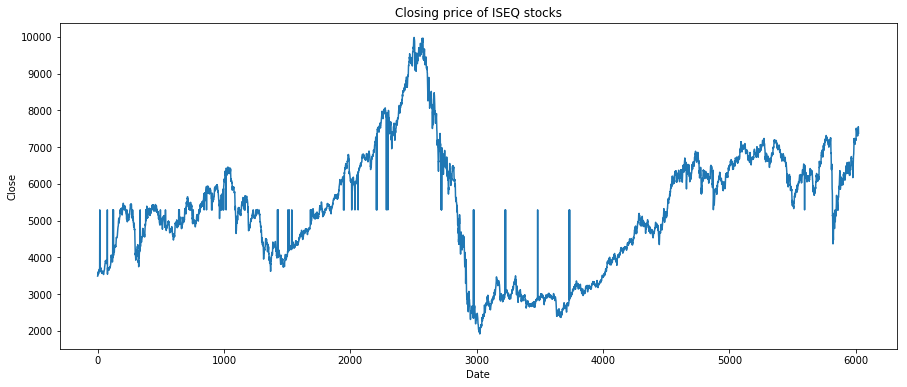

In [8]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of ISEQ stocks")
plt.show()

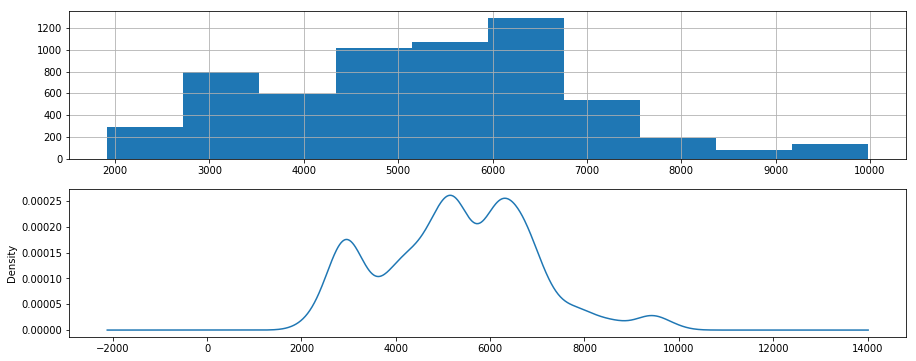

In [9]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [10]:
df.dropna(inplace= True)

### Augmented Dickey Fuller test for testing the stationarity of data

In [11]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [12]:
Augmented_Dickey_Fuller_Test_func(df['Close'],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -4.598682
p-value                           0.000130
No Lags Used                      0.000000
Number of Observations Used    6023.000000
Critical Value (1%)              -3.431436
Critical Value (5%)              -2.862020
Critical Value (10%)             -2.567025
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


### Splitting Dataset into Train and Test

In [13]:
X = df[['Close']]
train, test = X[0:-90], X[-90:]

### ARIMA Model

In [14]:
model = auto_arima(train,start_p=1, start_q=1,
max_p=7, max_q=7, seasonal=False,
d=None, trace=True,error_action='ignore',suppress_warnings=True,
stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=77596.327, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=79301.667, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78229.275, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=77594.365, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=79299.710, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=77596.310, Time=1.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=77492.790, Time=1.82 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=77451.793, Time=1.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=77502.044, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=77451.119, Time=2.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=77473.251, Time=2.76 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=77440.543, Time=2.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=77471.048, Time=0.96 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=77442.262, Time=4.41 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5934
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -38712.361
Date:                Mon, 04 Jan 2021   AIC                          77438.723
Time:                        23:35:13   BIC                          77485.541
Sample:                             0   HQIC                         77454.990
                               - 5934                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7320      0.037    -19.861      0.000      -0.804      -0.660
ar.L2          0.1558      0.050      3.123      0.002       0.058       0.254
ar.L3          0.2033      0.030      6.717      0.000       0.144       0.263
ar.L4          0.1247      0.015      8.599      0.000       0.096       0.153
ma.L1          0.1738      0.036      4.784      0.000       0.103       0.245
ma.L2         -0.6474      0.035    -18.333      0.000      -0.717      -0.578
sigma2      2.735e+04     85.886    318.423      0.000    2.72e+04    2.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1763490.71
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        87.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction

In [15]:
prediction,conf_int = model.predict(n_periods=90,
return_conf_int=True)
prediction= pd.DataFrame(prediction,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound',
'Lower_bound'])
df_conf["new_index"] = range(5934,6024)
df_conf = df_conf.set_index("new_index")


### Function for Model Evaluation Metrics

In [16]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    print(f'ACCURACY is : {(100 - (mean_absolute_percentage_error(y_true, y_pred)))}')
    

### Model Performance

In [17]:
timeseries_evaluation_metrics_func(test, prediction)

Evaluation metric results:-
MSE is : 300037.31866471225
MAE is : 420.4189824756768
RMSE is : 547.7566235699138
MAPE is : 5.881653505609324
R2 is : -0.5808811945844232

ACCURACY is : 94.11834649439068


### Setting index for plotting

In [18]:
prediction["new_index"] = range(5934, 6024)
prediction = prediction.set_index("new_index")

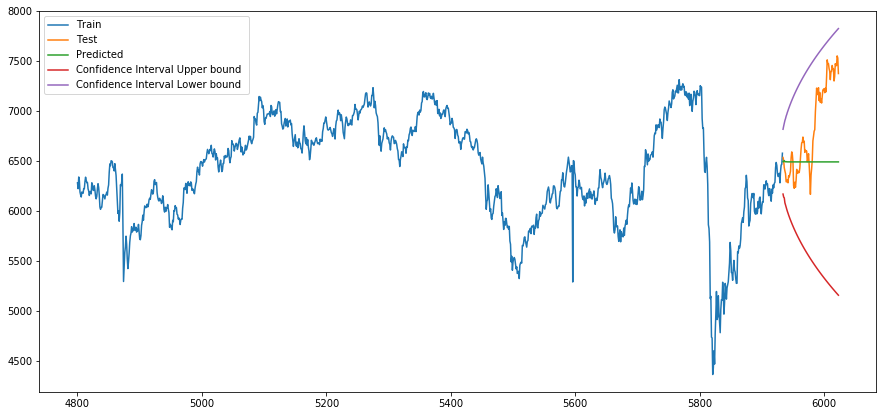

In [19]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train [4800:6024], label='Train ')
plt.plot(test, label='Test ')
plt.plot(prediction, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

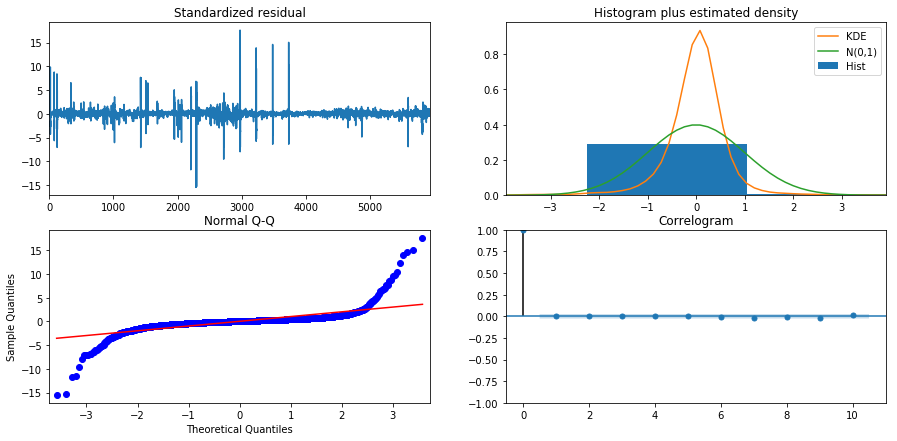

In [20]:
model.plot_diagnostics();